In [1]:
# # Setting the project folder as the root folder to import project packages
import os
os.chdir('../')

from src.data_scraper.scraper_binance import BinanceScraper
from src.order_executer.service.data_service import TrainingDataService

In [2]:
data_service = TrainingDataService(interval_period_in_minutes=1, channels=[BinanceScraper()],
                                   start_date="2018-01-24", end_date="2022-02-13")

In [3]:
_ = data_service.initialize()

Initializing Training Data Service


# Plot price evolution

In [4]:
data = data_service.channels['Binance'].cache_data

In [5]:
data['exact_time'] = data['exact_time'].astype('datetime64[ns]')

In [6]:
import matplotlib.pyplot as plt
from src import config

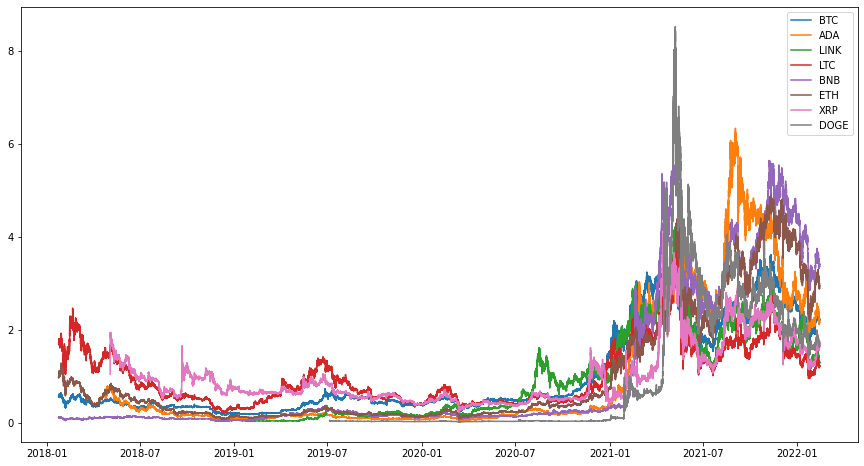

In [7]:
fig, ax = plt.subplots(figsize=(15,8))
[ax.plot(data['exact_time'], data[f'{crypto}USDT_Close'] / data[f'{crypto}USDT_Close'].mean())
 for crypto in config.ALL_CURRENCIES]
plt.legend(config.ALL_CURRENCIES)